## DataFrame 구조
### - index(row), column(column), data

In [1]:
import pandas as pd

In [2]:
num_list=range(0,51,10)

In [3]:
df_numlist = pd.DataFrame(data=num_list)

In [4]:
df_numlist

,0
0,0
1,10
2,20
3,30
4,40
5,50


## Series 구조
### - index(row), data

In [5]:
import pandas as pd
import numpy as np

In [6]:
single_data = np.arange(0.1, 0.6, 0.1)
single_data

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [7]:
series_floats = pd.Series(data=single_data)

In [8]:
series_floats

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64

In [9]:
type(series_floats)

pandas.core.series.Series

## numpy를 이용해 random한 Dataframe 데이터 생성

In [10]:
import pandas as pd
import numpy as np

In [11]:
pd.__version__

'1.5.3'

In [12]:
np.__version__

'1.24.3'

In [13]:
np.random.randint(0,100) # 0에서 99까지의 숫자 중 랜덤하게 하나의 정수 값을 출력

57

In [14]:
np.random.randint(0,100,size=(10, 5)) # size 옵션 : 10행 5열의 랜덤한 array 행렬

array([[69, 36, 10, 44, 57],
       [12,  2, 29, 22, 77],
       [82, 65, 45, 19, 39],
       [20, 85, 12, 26, 90],
       [70, 65, 89, 81, 71],
       [70, 68, 52,  8, 97],
       [16, 41, 51,  4, 79],
       [66, 96, 37, 11, 17],
       [48, 74, 77, 11, 52],
       [49, 91, 60, 82, 69]])

In [15]:
num_array = np.random.randint(0,100,size=(10, 5))

In [16]:
df_by_randint = pd.DataFrame(num_array)
df_by_randint

,0,1,2,3,4
0,80,23,79,92,47
1,15,98,68,85,13
2,95,87,97,2,52
3,70,80,76,40,2
4,94,86,83,32,77
5,57,42,35,66,81
6,5,29,78,80,24
7,67,32,25,59,56
8,6,46,92,92,83
9,97,67,98,66,86


## 파이썬 내장 random 모듈 이용해 random한 Dataframe 데이터 생성

In [17]:
import random

In [18]:
random.randrange(0, 100)

71

In [19]:
random_double_list = [[random.randrange(0, 100) for _ in range(5)] for _ in range(5)] # 이중 for문 이용해 array 행렬 작성

In [20]:
random_double_list

[[2, 75, 33, 18, 71],
 [92, 65, 27, 56, 90],
 [26, 9, 42, 92, 27],
 [50, 10, 39, 47, 38],
 [30, 47, 78, 54, 49]]

In [21]:
df_by_randrange = pd.DataFrame(random_double_list)

In [22]:
df_by_randrange

,0,1,2,3,4
0,2,75,33,18,71
1,92,65,27,56,90
2,26,9,42,92,27
3,50,10,39,47,38
4,30,47,78,54,49


## 수업

In [23]:
double_list = [
    [1000, '과자','2019-12-31','반품'],
    [2000, '음료', '2020-03-02', '정상'],
    [3000, '아이스크림', '2020-02-03','정상'],
    [1000,'과자','2019-12-31','반품'],
    [2000,'과자','2020-02-03','반품']
    ]
df_sales = pd.DataFrame(data=double_list)
df_sales

,0,1,2,3
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품
4,2000,과자,2020-02-03,반품


In [24]:
df_sales = pd.DataFrame(data=double_list, columns=['가격','종류','판매일자','반품여부'])
df_sales

,가격,종류,판매일자,반품여부
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품
4,2000,과자,2020-02-03,반품


### apply()
### cell간의 계산 => index 가격차이 추가

In [25]:
def mean_sub(cell_value) :
    result = df_sales['가격'].mean() - cell_value
    return result

In [26]:
mean_sub(800)

1000.0

In [27]:
df_sales['가격'].apply(mean_sub)

0     800.0
1    -200.0
2   -1200.0
3     800.0
4    -200.0
Name: 가격, dtype: float64

In [28]:
df_sales['가격차이'] = df_sales['가격'].apply(mean_sub)

In [29]:
df_sales.dtypes

가격        int64
종류       object
판매일자     object
반품여부     object
가격차이    float64
dtype: object

### 두 개의 cell 간의 계산

In [60]:
df_sales['가격'] + df_sales['가격차이']

0    1800.0
1    1800.0
2    1800.0
3    1800.0
4    1800.0
dtype: float64

In [30]:
# dropped_df_sales=df_sales.drop('종류', '판매일자')
# dropped_df_sales

In [31]:
## 필터
condition = (df_sales['반품여부']=='정상')
condition

0    False
1     True
2     True
3    False
4    False
Name: 반품여부, dtype: bool

In [32]:
type(condition)

pandas.core.series.Series

In [33]:
df_sales.loc[condition]

,가격,종류,판매일자,반품여부,가격차이
1,2000,음료,2020-03-02,정상,-200.0
2,3000,아이스크림,2020-02-03,정상,-1200.0


In [34]:
## 필터 조건 여러개
## and & , or |
condition_or = (df_sales['가격']>=2500) | (df_sales['가격']<=1500)
condition_or

0     True
1    False
2     True
3     True
4    False
Name: 가격, dtype: bool

In [35]:
condition_and = (df_sales['반품여부']=='정상')  | (df_sales['종류']=='과자') & (df_sales['가격']>=1500)
condition_and

0    False
1     True
2     True
3    False
4     True
dtype: bool

In [36]:
df_sales

,가격,종류,판매일자,반품여부,가격차이
0,1000,과자,2019-12-31,반품,800.0
1,2000,음료,2020-03-02,정상,-200.0
2,3000,아이스크림,2020-02-03,정상,-1200.0
3,1000,과자,2019-12-31,반품,800.0
4,2000,과자,2020-02-03,반품,-200.0


In [37]:
# drd_df_sales=df_sales[['가격','반품여부']]
# drd_df_sales

In [38]:
## 요약
df_sales.pivot_table(index='종류', values='가격')

,가격
종류,
과자,1333.333333
아이스크림,3000.000000
음료,2000.000000


In [39]:
pd.pivot_table(data=df_sales, index='종류', values='가격')

,가격
종류,
과자,1333.333333
아이스크림,3000.000000
음료,2000.000000


In [40]:
import numpy as np

In [41]:
df_sales.pivot_table(index='종류', values='가격', aggfunc=np.max)

,가격
종류,
과자,2000
아이스크림,3000
음료,2000


# 통계 수치 표현


In [42]:
import numpy as np

In [43]:
arr = np.array([6,4,1,3,5,3,10,7,9])

In [44]:
arr

array([ 6,  4,  1,  3,  5,  3, 10,  7,  9])

In [45]:
#평균값
np.mean(arr)

5.333333333333333

In [46]:
#중앙값
np.median(arr)

5.0

In [47]:
#최소값, 최대값
print(np.min(arr),np.max(arr))

1 10


In [48]:
#분산, 표준편차
np.var(arr), np.std(arr)

(7.777777777777778, 2.788866755113585)

In [49]:
df_sales.pivot_table(index=['반품여부', '종류'], values='가격', aggfunc=[np.sum, np.min, np.size])

sum  amin size
              가격    가격   가격
반품여부 종류                    
반품   과자     4000  1000    3
정상   아이스크림  3000  3000    1
     음료     2000  2000    1

In [50]:
np.size(arr)

9

### IQR

In [51]:
import numpy as np
data = np.array([44, 32, 53, 75, 36, 45, 25, 49, 46, 28])

In [52]:
Q1 = np.percentile(data, 25)

In [53]:
Q3 = np.percentile(data, 75)

In [54]:
Q1, Q3

(33.0, 48.25)

In [55]:
Q3-Q1 # box 안에 들어가는 range

15.25

In [56]:
np.median(data)

44.5

In [57]:
Q1, Q3, Q3-Q1, np.median(data)

(33.0, 48.25, 15.25, 44.5)

In [58]:
import seaborn as sns

<Axes: >

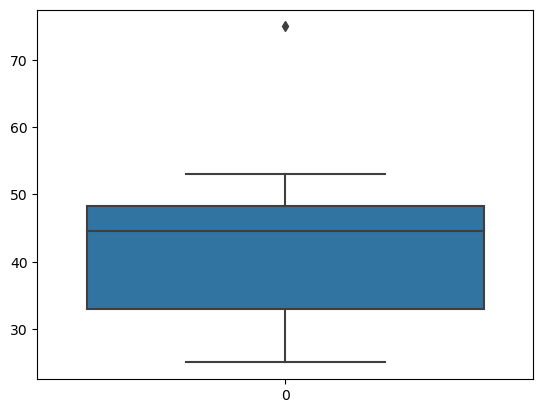

In [59]:
sns.boxplot(data)